In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,minmax_scale
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report


In [3]:
df = pd.read_csv('data.csv')

Visualización de la informacion

In [ ]:
df.head(10)

In [ ]:
df.columns

In [ ]:
df.describe()

EDA

In [ ]:
print('Duplicados en el dataset', df.duplicated().sum())

In [4]:
# Cambia el nombre de la columna eliminando los espacios sobrantes
df.rename(columns={'num       ': 'num'}, inplace=True)
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [5]:
# Valores faltantes
df.replace('?', np.nan, inplace=True)
data = df.apply(pd.to_numeric, errors='coerce')
print(data.isnull().sum())

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64


In [6]:
df.fillna(data.mean(), inplace=True)
print(data.isnull().sum())

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64


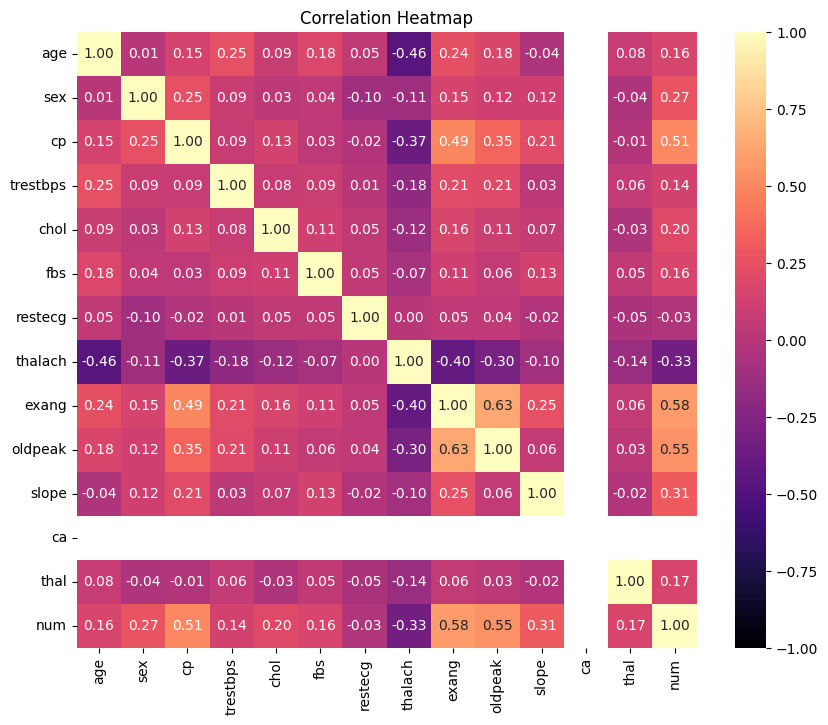

In [7]:
# Matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='magma', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
x=df[['age', 'sex', 'cp','trestbps', 'chol', 'fbs','restecg', 'thalach', 'exang', 'oldpeak', 'slope','thal']]
y=df['num']
print(x)
print(y)

     age  sex  cp trestbps        chol fbs restecg thalach exang  oldpeak  \
0     28    1   2      130         132   0       2     185     0      0.0   
1     29    1   2      120         243   0       0     160     0      0.0   
2     29    1   2      140  250.848708   0       0     170     0      0.0   
3     30    0   1      170         237   0       1     170     0      0.0   
4     31    0   2      100         219   0       1     150     0      0.0   
..   ...  ...  ..      ...         ...  ..     ...     ...   ...      ...   
289   52    1   4      160         331   0       0      94     1      2.5   
290   54    0   3      130         294   0       1     100     1      0.0   
291   56    1   4      155         342   1       0     150     1      3.0   
292   58    0   2      180         393   0       0     110     1      1.0   
293   65    1   4      130         275   0       1     115     1      1.0   

        slope      thal  
0    1.894231  5.642857  
1    1.894231  5.642857

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

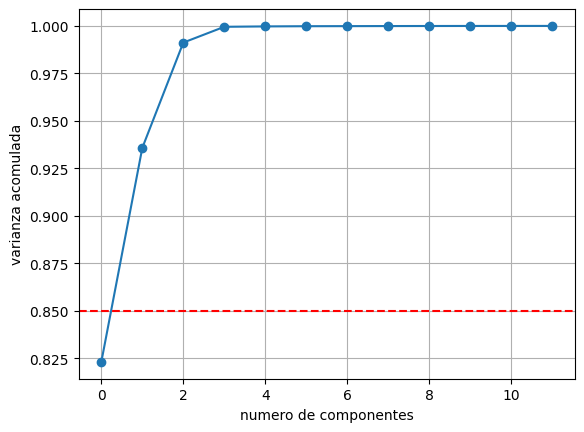

In [21]:
pca = PCA()
xtr = pca.fit_transform(x_train)
xts = pca.transform(x_test)
varianza_explicada = pca.explained_variance_ratio_
varianza_explicada_acomulada = varianza_explicada.cumsum()
plt.plot(varianza_explicada_acomulada, marker ="o")
plt.xlabel("numero de componentes")
plt.ylabel("varianza acomulada")
plt.grid(True)
plt.show()

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


In [30]:
BOSQUES_ALEATORIOS = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Matriz de confusion")
print(rf_conf_matrix)
print("\n")
print("Accuracy del bosque aleatorio:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[29  5]
 [ 7 18]]


Accuracy of Random Forest: 79.66101694915254 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        34
           1       0.78      0.72      0.75        25

    accuracy                           0.80        59
   macro avg       0.79      0.79      0.79        59
weighted avg       0.80      0.80      0.80        59



In [32]:
ARBOLITOS = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Matriz de confusión")
print(dt_conf_matrix)
print("\n")
print("Accuracy de arbolito:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

Matriz de confusión
[[27  7]
 [10 15]]


Accuracy de arbolito: 71.1864406779661 

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        34
           1       0.68      0.60      0.64        25

    accuracy                           0.71        59
   macro avg       0.71      0.70      0.70        59
weighted avg       0.71      0.71      0.71        59

